# SNLP Assignment 5 

Name 1: William LaCroix<br/>
Student id 1: 7038732<br/>
Email 1: williamplacroix@gmail.com<br/>


Name 2: Nicholas Jennings<br/>
Student id 2: 2573492<br/>
Email 2: s8nijenn@stud.uni-saarland.de<br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after your upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

# Exercise 1: Back-Off and Interpolation (5 points) </br>

In Assignment 4, we implemented a simple smoothing technique by presuming counts where they did not exist. A more informed version of smoothing is to look into lower order n-grams when we see novel word combinations. There are two popular ways of doing this: Katz backoff and linear interpolation. 


1. Look these terms up and describe how they differ in 3-4 sentences (0.5 points)

2. We generally use cross validation to determine the hyperparameters used in these models. Describe k-fold cross validation in your own words (0.5 points)

3. Let's implement an interpolated ngram model. Write a Language model class that trains an ngram model on a training corpus ```(List[List[str]])``` and computes the perplexity on a test corpus ```(List[List[str]])```. Use add-$\alpha$ smoothing and interpolation weights of $\lambda_i=\frac{1}{n}, \forall i \in \{1\dots n\}$ where $n$ is the order of the model. As usual, you will need to account for OOV tokens with ```<unk>```. Use the top_5000 words for vocabulary. You may reuse code from Asignment 4. (2 points)

4. Find the optimal $\alpha$ for smoothing and the optimal n-gram order using 5-fold cross validation (independently).  (2 points)

We expect you to make some design choices yourself. Please document them appropriately.

### Answers Exercise 1:

1. Linear interpolation vs Katz backoff
- Linear interpolation works by a linear combination of the weighted probabilities for n-grams with various history lengths. Weights must be greater than 0, and sum to 1.
- Katz backoff is non-linear backoff model that iterates through progressively shorter histories, until the count of the seen history is above a given threashold level. As opposed to linear interpolation, Katz backoff gives a single weighted probability, depending on the n-gram order, rather than a linear combination of the various probabilities.

2. K-fold cross validation divides the dataset into k (1 > k > n) equally sized pieces. The model is then iteratively trained, reserving a new 'fold' each iteration, and the model's performance is averaged across k training runs. Larger values of k reserve smaller sections of data for the test set, up to n (LOO-CV). Iterating over unique test sets helps avoid poor model performance due to an unpredictable skew in the test data sample.

4. Based on the 5-fold average perplexities, it seems like the bigram probability with low alpha (alpha = 0.1) performed the best out of the various models. The unigram model performed the worst by far, and the higher order n-gram models performed less well. Performance also increased with low alphas for every model except for the unigram model, where performance decreased with low alphas.

In [1]:
import exercise_1
from importlib import reload
exercise_1 = reload(exercise_1)
import numpy as np

MAX_N = 5
MAX_ALPHA = 1
ALPHA_STEPS = 11

corpus = exercise_1.load_and_preprocess_data()

# restrict the vocabulary to the top 5000 words


#implement cross validation to find optimal n and alpha. You might want to do this independently.
ns: list = []
alphas: list = []
perplexities: list = []
restricted_corpus = exercise_1.restrict_vocab(corpus)

for n in range(1, MAX_N+1): # for each model order from n = 1 to n = 5
    for alpha in np.linspace(0.0001, MAX_ALPHA, ALPHA_STEPS): # for each alpha between 0 and 1
        temp_perplexities:list = []
        for split in range(5): # for each split in k=5 fold cross validation
            start: int = split*len(restricted_corpus)//5
            stop: int = (split + 1)*len(restricted_corpus)//5
            train,test = exercise_1.split_corpus(restricted_corpus, start, stop)
            model = exercise_1.InterpolatedModel(train, test, order=n, alpha=alpha)
            temp_perplexities.append(model.perplexity())
            #Calculate test perplexity
        model_perplexity = np.mean(temp_perplexities)
        ns.append(n)
        alphas.append(alpha)
        perplexities.append(model_perplexity)
        print("5-fold average perplexity for model order", n, "with alpha", round(alpha,3), ":", model_perplexity)

c:\Users\William\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\William\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\William\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


5-fold average perplexity for model order 1 with alpha 0.0 : 1036.3643295752868
5-fold average perplexity for model order 1 with alpha 0.1 : 813.3934855898478
5-fold average perplexity for model order 1 with alpha 0.2 : 792.6692817160132
5-fold average perplexity for model order 1 with alpha 0.3 : 780.4366586316086
5-fold average perplexity for model order 1 with alpha 0.4 : 771.7540035986101
5-fold average perplexity for model order 1 with alpha 0.5 : 765.0740697617263
5-fold average perplexity for model order 1 with alpha 0.6 : 759.7017870464472
5-fold average perplexity for model order 1 with alpha 0.7 : 755.2611526359049
5-fold average perplexity for model order 1 with alpha 0.8 : 751.5237611294458
5-fold average perplexity for model order 1 with alpha 0.9 : 748.3393548211901
5-fold average perplexity for model order 1 with alpha 1.0 : 745.6031639608207
5-fold average perplexity for model order 2 with alpha 0.0 : 0.013202991760208033
5-fold average perplexity for model order 2 with

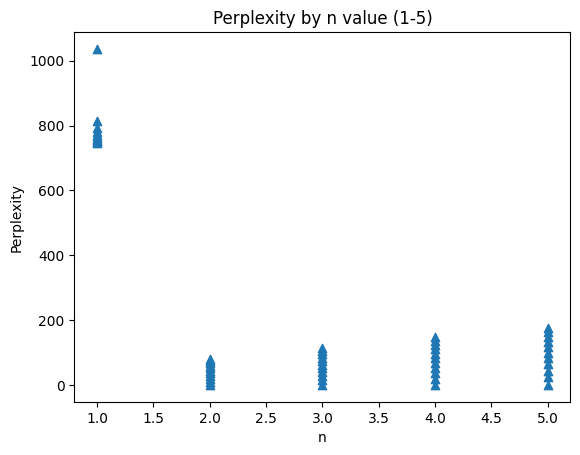

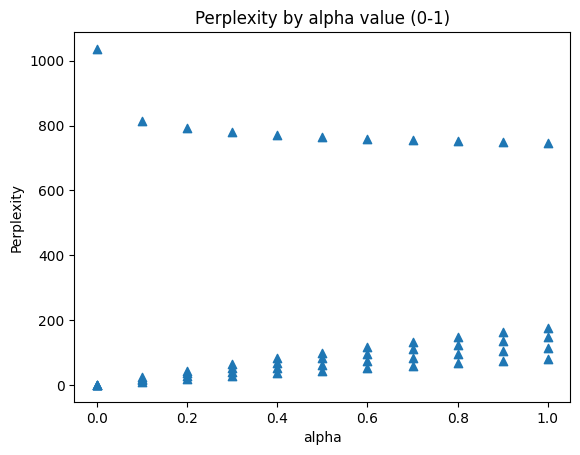

In [2]:
import matplotlib.pyplot as plt
plt.scatter(ns, perplexities, marker="^")
plt.ylabel("Perplexity")
plt.xlabel("n")
plt.title("Perplexity by n value (1-5)")
plt.show()
plt.scatter(alphas, perplexities, marker="^")
plt.ylabel("Perplexity")
plt.xlabel("alpha")
plt.title("Perplexity by alpha value (0-1)")
plt.show()

## Exercise 2: Kneser-Ney Smoothing (5 points)


Consider the following notation


- $V$ - LM vocabulary
-  $N (x)$ - count of the n-gram x in the training corpus 
- $N_+(\bullet w) \triangleq |\{u : N (u, w) > 0\}|$ - number of bigram types ending in w
- $N_+(w \bullet) \triangleq |\{u : N (w, u) > 0\}|$ - number of bigram types starting with w
- $N_+(\bullet w \bullet) \triangleq |\{(u,v) : N (u, w, u) > 0\}|$ - number of trigram types with w in the middle

This exercise aims to provide a basic understanding of Kneser-Ney Smoothing. Kneser-Ney Smoothing makes use of *continuation counts* of words for lower order n-grams, given as

\begin{equation}
C_{KN} = 
\begin{cases}
\text{count}(\bullet) & \text{for highest order} \\
\text{continuationcount}(\bullet) & \text{for lower orders}
\end{cases}
\end{equation}


For a trigram model, Kneser-Ney Smoothing is implemented using the following equations:

$$P_{KN}(w_3|w_1, w_2) = \frac{\max\{N(w_1 w_2 w_3)-d,0\}}{N(w_1 w_2)} + \lambda(w_1, w_2)P_{KN}(w_3|w_2)$$

$$P_{KN}(w_3|w_2) = \frac{\max\{N_{+}(\bullet w_2 w_3)-d,0\}}{N_{+}(\bullet w_2 \bullet)} + \lambda(w_2)P_{KN}(w_3)$$

\begin{equation}
P_{KN}(w_3) = \begin{cases}
\frac{N_{+}(\bullet w_3)}{N_{+}(\bullet \bullet)} & \text{if $w_3 \in$ V} \\
\frac{1}{V} & \text{otherwise}
\end{cases}
\end{equation}

$\lambda$ is used to normalise the discounted probability mass and is given by

$$\lambda(w_1, w_2) = \frac{d}{N(w_1 w_2)} \cdot N_{+}(w_1 w_2 \bullet)$$

$$\lambda(w_2) = \frac{d}{N(w_2)} \cdot N_{+}(w_2 \bullet)$$


1. Explain the main intuition behind Kneser-Ney language models and discuss how it is
different from absolute discounting LMs [1 point]

2. Assume that we make a trigram model from [alice_in_wonderland.txt](https://gist.github.com/phillipj/4944029). Preprocess the text by first removing all punctuation, lowercasing, and then tokenisation. There is no need to split the data into train and test sets. (0.5 points)

3. Code a function that calculates the bigram probability $P_{KN}(w_3|w_2)$ using the equations provided. The discounting parameter d = 0.75. Use your function to calculate the probabilities $P_{KN}(nothing|said)$ and $P_{KN}(nichts|said)$. (2 points)

4. Manually compute the MLE and the Add-1 probabilities for the same bigrams. How do these compare to Kneser-Ney smoothing? (1 point)

### Answer Exercise 2:

1. Absolute discounting subtracts a fixed value from the count of each n-gram in order to shift probability mass. Kneser-Ney smoothing uses modified discounting values based on the count of occurrences of unique words in the history. A 'continuation count'

In [10]:
from importlib import reload
import exercise_2
exercise_2=reload(exercise_2)

text=open('alice_in_wonderland.txt').read()
tokenized_text=exercise_2.preprocess_text(text)
print(tokenized_text[:100])


#Feel free to not use a class. This is just boilerplate.
#BigramCounter = exercise_2.KneserNeyCounter(args)
#BigramCounter.prob(bigram) 


['alices', 'adventures', 'in', 'wonderland', 'alices', 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', '30', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'without', 'pictures', 'or', 'conversation', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and']


# Bonus Question: Good Turing Smoothing (2 points)


We know that Add-alpha discounting is not very efficient since it takes away too much probability mass for distribution. A better alternative is Good-Turing smoothing, whoch distributes probbaility mass for a lower order ngram from immediately higher ngrams. 

1. Describe the central idea behind Good-Turing smoothing and state the formulas for Good Turing counts and Good Turing probability. (0.5)

2. Given some fixed history, How much probability mass is set aside when we use Good Turing counts? Express this mathematically. (1 point) 

   
3. What is the main problem with Good Turing estimation? (0.5)


### Answers Bonus:

1. Good-Turing Smoothing reestimates count frequencies for zero- and low-count n-grams based on the number of n-grams with higher counts.

2. The set-aside mass is given by:
$\alpha (h)=\frac{n_1}{N}$</br>
Where $n_r$ is the number of n-grams with count $r$, $N$ is the total number of tokens in the training set, $h$ is the context/history.

3. The main problem with Good-Turing estimation is that the revised estimated counts contain an n-gram count in the denominator, and since most counts will tend toward zero with increasing values of $r$, there will be many zero-counts, leading to a lot of undefined behaviour. Good old Katz came to the rescue again though, proposing a cutoff threshold preventing zero-counts from messing with our definition of division.